# Data Understanding and Visualize distributions
This notebook covers **Data Collection & Exploration** for the IPIP-120 dataset.  
We will:
1. Load dataset from reliable source.  
2. Get an overview (shape, types, missing values).  
3. Generate summary statistics.  
4. Identify issues (outliers, missing values, duplicates).

In [2]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


In [3]:
# Load raw dataset
data_path = "../data/raw/data-final.csv"  # <-- adjust if your file is .tsv
df = pd.read_csv(data_path, sep="\t")

# Preview
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [5]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
df.info()

Shape: (1015341, 110)

Columns: ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E', 'dateload', 'screenw', 'screenh', 'introelapse', 'testela

In [6]:
# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing[missing > 0])

# Duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


Missing values:
 screenw        2066
introelapse    2066
screenh        2066
EXT3           1783
EXT1           1783
               ... 
OPN7_E         1783
OPN6_E         1783
testelapse     1783
OPN10_E        1783
country          77
Length: 105, dtype: int64

Duplicate rows: 0


In [7]:
# Numeric summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EXT1,1013558.0,2.648067,1.264407e+00,0.0,1.0,3.0,4.0,5.000000e+00
EXT2,1013558.0,2.773115,1.323943e+00,0.0,2.0,3.0,4.0,5.000000e+00
EXT3,1013558.0,3.288349,1.215006e+00,0.0,2.0,3.0,4.0,5.000000e+00
EXT4,1013558.0,3.140595,1.237442e+00,0.0,2.0,3.0,4.0,5.000000e+00
EXT5,1013558.0,3.276960,1.277593e+00,0.0,2.0,3.0,4.0,5.000000e+00
...,...,...,...,...,...,...,...,...
screenh,1013275.0,826.261104,1.802490e+02,0.0,720.0,768.0,900.0,8.802000e+03
introelapse,1013275.0,959.074776,5.104005e+04,0.0,5.0,10.0,30.0,2.944307e+07
testelapse,1013558.0,675.423329,2.017864e+04,1.0,171.0,224.0,313.0,1.189272e+07
endelapse,1015341.0,2701.409845,1.483898e+06,1.0,9.0,13.0,18.0,1.493327e+09


In [8]:
# --- Safe Trait Computation ---
def compute_trait_safe(df, items, name):
    """
    Compute a Big Five trait score safely from exactly the 10 correct items.
    Excludes any '_E' columns automatically.
    """
    cols = [c for c in items if c in df.columns]
    if cols:
        df[name] = df[cols].mean(axis=1)
        print(f"✅ {name}: computed from {len(cols)} items")
    else:
        print(f"⚠️ No valid items found for {name}")

# Define correct item groups
trait_items = {
    "EXT": [f"EXT{i}" for i in range(1, 11)],
    "NEU": [f"EST{i}" for i in range(1, 11)],  # Neuroticism = EST
    "AGR": [f"AGR{i}" for i in range(1, 11)],
    "CON": [f"CSN{i}" for i in range(1, 11)],
    "OPN": [f"OPN{i}" for i in range(1, 11)],
}

# Recompute traits
for trait, items in trait_items.items():
    compute_trait_safe(df, items, trait)

# Quick check
print(df[["EXT","NEU","AGR","CON","OPN"]].describe())

✅ EXT: computed from 10 items
✅ NEU: computed from 10 items
✅ AGR: computed from 10 items
✅ CON: computed from 10 items
✅ OPN: computed from 10 items
                EXT           NEU           AGR           CON           OPN
count  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06
mean   3.023496e+00  3.024140e+00  3.155447e+00  3.123388e+00  3.265830e+00
std    3.860964e-01  6.733325e-01  4.022586e-01  4.284491e-01  4.296049e-01
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    2.800000e+00  2.600000e+00  2.900000e+00  2.900000e+00  3.000000e+00
50%    3.000000e+00  3.000000e+00  3.200000e+00  3.100000e+00  3.300000e+00
75%    3.200000e+00  3.500000e+00  3.400000e+00  3.400000e+00  3.500000e+00
max    5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00


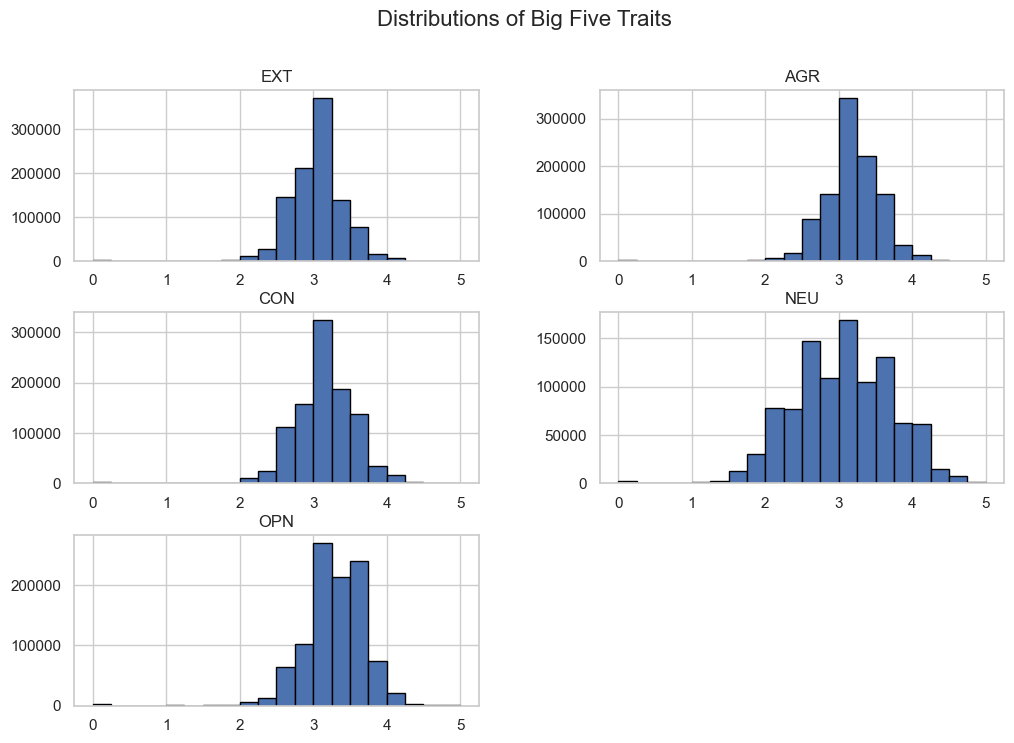

In [9]:
trait_cols = ["EXT", "AGR", "CON", "NEU", "OPN"]  # Big Five scores
df[trait_cols].hist(bins=20, figsize=(12, 8), edgecolor="black")
plt.suptitle("Distributions of Big Five Traits", fontsize=16)
plt.show()

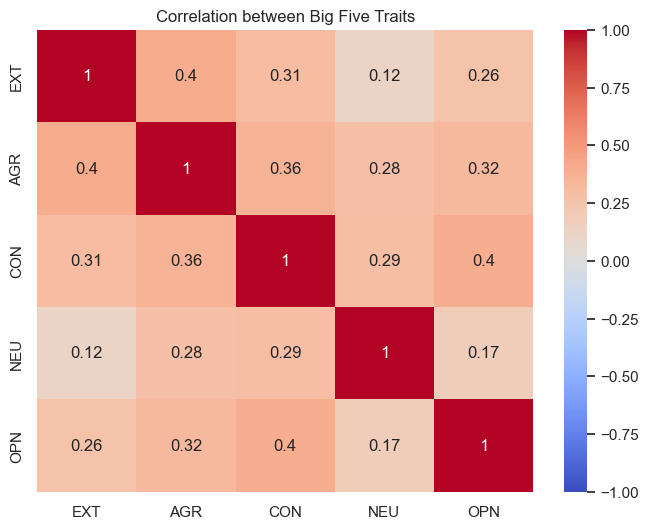

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df[trait_cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation between Big Five Traits")
plt.show()

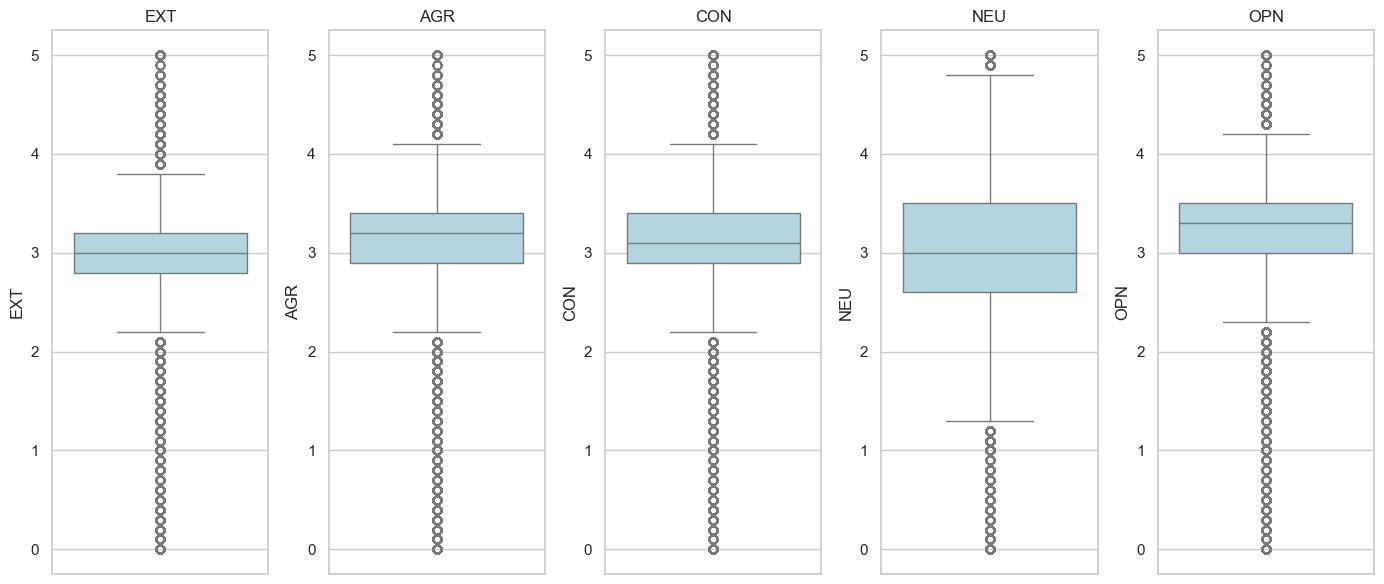

In [11]:
plt.figure(figsize=(14, 6))
for i, col in enumerate(trait_cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(col)
plt.tight_layout()
plt.show()

In [12]:
# Save initial cleaned copy (no changes yet, just raw → interim)
df.to_csv("../data/interim/preprocessed.csv", index=False)
print("✅ Saved interim dataset to data/interim/preprocessed.csv")

✅ Saved interim dataset to data/interim/preprocessed.csv
